# Exploratory Data Analysis (EDA)

## Introduction
This notebook is dedicated to the initial exploration of our cleaned Airbnb datasets for Paris and Los Angeles. Through EDA, we aim to uncover patterns, relationships, and interesting insights that will guide our further analysis.

## Objectives
1. Understand the basic statistics and distribution of key variables
2. Explore relationships between different features
3. Identify temporal patterns in pricing and availability
4. Compare and contrast the rental markets of Paris and Los Angeles
5. Generate hypotheses for further investigation

## Contents
1. Basic Statistical Analysis
2. Distribution Analysis of Key Variables
3. Correlation Analysis
4. Temporal Patterns Exploration
5. Geospatial Analysis
6. Paris vs. Los Angeles: Comparative Analysis
7. Hypothesis Generation

Let's start by importing our cleaned datasets and the necessary libraries for our exploratory analysis.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
from scipy import stats

# Load the data
df = pd.read_csv('raw_data/merged/merged_listings_detailed.csv')  # Replace with your actual file name

# Function to check for exact duplicates
def check_exact_duplicates(col1, col2):
    return (df[col1] == df[col2]).all()

# Function to check for high correlation
def check_correlation(col1, col2):
    if df[col1].dtype == 'object' or df[col2].dtype == 'object':
        return None
    return df[col1].corr(df[col2])

# Function to check if one column is derivable from others
def check_derivable(target_col, source_cols):
    target = df[target_col]
    sources = df[source_cols]
    
    # Try a simple linear regression
    X = sources
    y = target
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    return r_value ** 2  # Return R-squared value

# Open a file to write the results
with open('duplication_analysis.txt', 'w') as f:
    # Check host information
    f.write("Host Information:\n")
    f.write(f"host_listings_count and host_total_listings_count are identical: {check_exact_duplicates('host_listings_count', 'host_total_listings_count')}\n")
    f.write(f"host_listings_count and calculated_host_listings_count are identical: {check_exact_duplicates('host_listings_count', 'calculated_host_listings_count')}\n")
    f.write(f"Correlation between host_listings_count and calculated_host_listings_count: {check_correlation('host_listings_count', 'calculated_host_listings_count')}\n\n")

    # Check location information
    f.write("Location Information:\n")
    f.write(f"neighbourhood and neighbourhood_cleansed are identical: {check_exact_duplicates('neighbourhood', 'neighbourhood_cleansed')}\n\n")

    # Check property characteristics
    f.write("Property Characteristics:\n")
    f.write(f"bathrooms and bathrooms_text contain the same information: {check_exact_duplicates('bathrooms', 'bathrooms_text')}\n\n")

    # Check pricing and availability
    f.write("Pricing and Availability:\n")
    f.write(f"minimum_nights and minimum_minimum_nights are identical: {check_exact_duplicates('minimum_nights', 'minimum_minimum_nights')}\n")
    f.write(f"maximum_nights and maximum_maximum_nights are identical: {check_exact_duplicates('maximum_nights', 'maximum_maximum_nights')}\n")
    f.write(f"Correlation between availability_30 and availability_60: {check_correlation('availability_30', 'availability_60')}\n")
    f.write(f"Correlation between availability_60 and availability_90: {check_correlation('availability_60', 'availability_90')}\n")
    f.write(f"Correlation between availability_90 and availability_365: {check_correlation('availability_90', 'availability_365')}\n\n")

    # Check review information
    f.write("Review Information:\n")
    r_squared = check_derivable('number_of_reviews', ['first_review', 'last_review', 'reviews_per_month'])
    f.write(f"R-squared for number_of_reviews derived from first_review, last_review, and reviews_per_month: {r_squared}\n")
    f.write(f"Correlation between review_scores_rating and review_scores_accuracy: {check_correlation('review_scores_rating', 'review_scores_accuracy')}\n")
    f.write(f"Correlation between review_scores_rating and review_scores_cleanliness: {check_correlation('review_scores_rating', 'review_scores_cleanliness')}\n")
    f.write(f"Correlation between review_scores_rating and review_scores_checkin: {check_correlation('review_scores_rating', 'review_scores_checkin')}\n")
    f.write(f"Correlation between review_scores_rating and review_scores_communication: {check_correlation('review_scores_rating', 'review_scores_communication')}\n")
    f.write(f"Correlation between review_scores_rating and review_scores_location: {check_correlation('review_scores_rating', 'review_scores_location')}\n")
    f.write(f"Correlation between review_scores_rating and review_scores_value: {check_correlation('review_scores_rating', 'review_scores_value')}\n\n")

    # Check calculated metrics
    f.write("Calculated Metrics:\n")
    sum_calc = df['calculated_host_listings_count_entire_homes'] + df['calculated_host_listings_count_private_rooms'] + df['calculated_host_listings_count_shared_rooms']
    f.write(f"Sum of calculated subcategories equals calculated_host_listings_count: {(sum_calc == df['calculated_host_listings_count']).all()}\n\n")

    # Check identifiers
    f.write("Identifiers:\n")
    f.write(f"id is contained in listing_url: {df.apply(lambda row: str(row['id']) in str(row['listing_url']), axis=1).all()}\n\n")

    # Check dates
    f.write("Dates:\n")
    f.write(f"last_scraped and calendar_last_scraped are identical: {check_exact_duplicates('last_scraped', 'calendar_last_scraped')}\n")
    
f.write("Analysis complete. Please review the results carefully before making any decisions about removing columns.")

print("Analysis complete. Results have been written to 'duplication_analysis.txt'.")

C:\Users\sjokk\AppData\Local\Temp\ipykernel_19488\3964519597.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_data/merged/merged_listings_detailed.csv')  # Replace with your actual file name


TypeError: '>=' not supported between instances of 'str' and 'float'

## Graph: neighbourhood pricing

In [2]:
# Load the raw_data
df = pd.read_csv('cleaned_data/cleaned_airbnb_data.csv')

# Calculate average price by neighbourhood
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values)
plt.xticks(rotation=90)
plt.title('Average Price by Neighbourhood (Top 20)')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.savefig('visualizations/avg_price_by_neighbourhood.png')
plt.close()

# Plotly

In [5]:
# Load the raw_data
df = pd.read_csv('cleaned_data/cleaned_airbnb_data.csv')

# Create the map
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="name", 
                        hover_data=["price", "room_type"],
                        color="price", 
                        #size="price",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Save the figure
fig.write_html("visualizations/plotly/airbnb_listings_map.html")

FileNotFoundError: [Errno 2] No such file or directory: 'visualizations\\plotly\\airbnb_listings_map.html'

In [8]:
# Load the raw_data
df = pd.read_csv('cleaned_data/cleaned_airbnb_data.csv')

# Create the box plot
fig = px.box(df, 
             x="room_type", 
             y="price", 
             color="room_type",
             title="Price Distribution by Room Type")

fig.update_layout(showlegend=False)

# Save the figure
fig.write_html("visualizations/plotly/price_distribution_by_room_type.html")

FileNotFoundError: [Errno 2] No such file or directory: 'visualizations\\plotly\\price_distribution_by_room_type.html'

C:\Users\sjokk\AppData\Local\Temp\ipykernel_22004\787919914.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  pricing_df = pd.read_csv("raw_data/merged/calendar_filtered_plus.csv")
C:\Users\sjokk\AppData\Local\Temp\ipykernel_22004\787919914.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_area = merged_df.groupby(['lat_bin', 'lon_bin'])['price'].mean().unstack()
C:\Users\sjokk\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sjokk\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na op

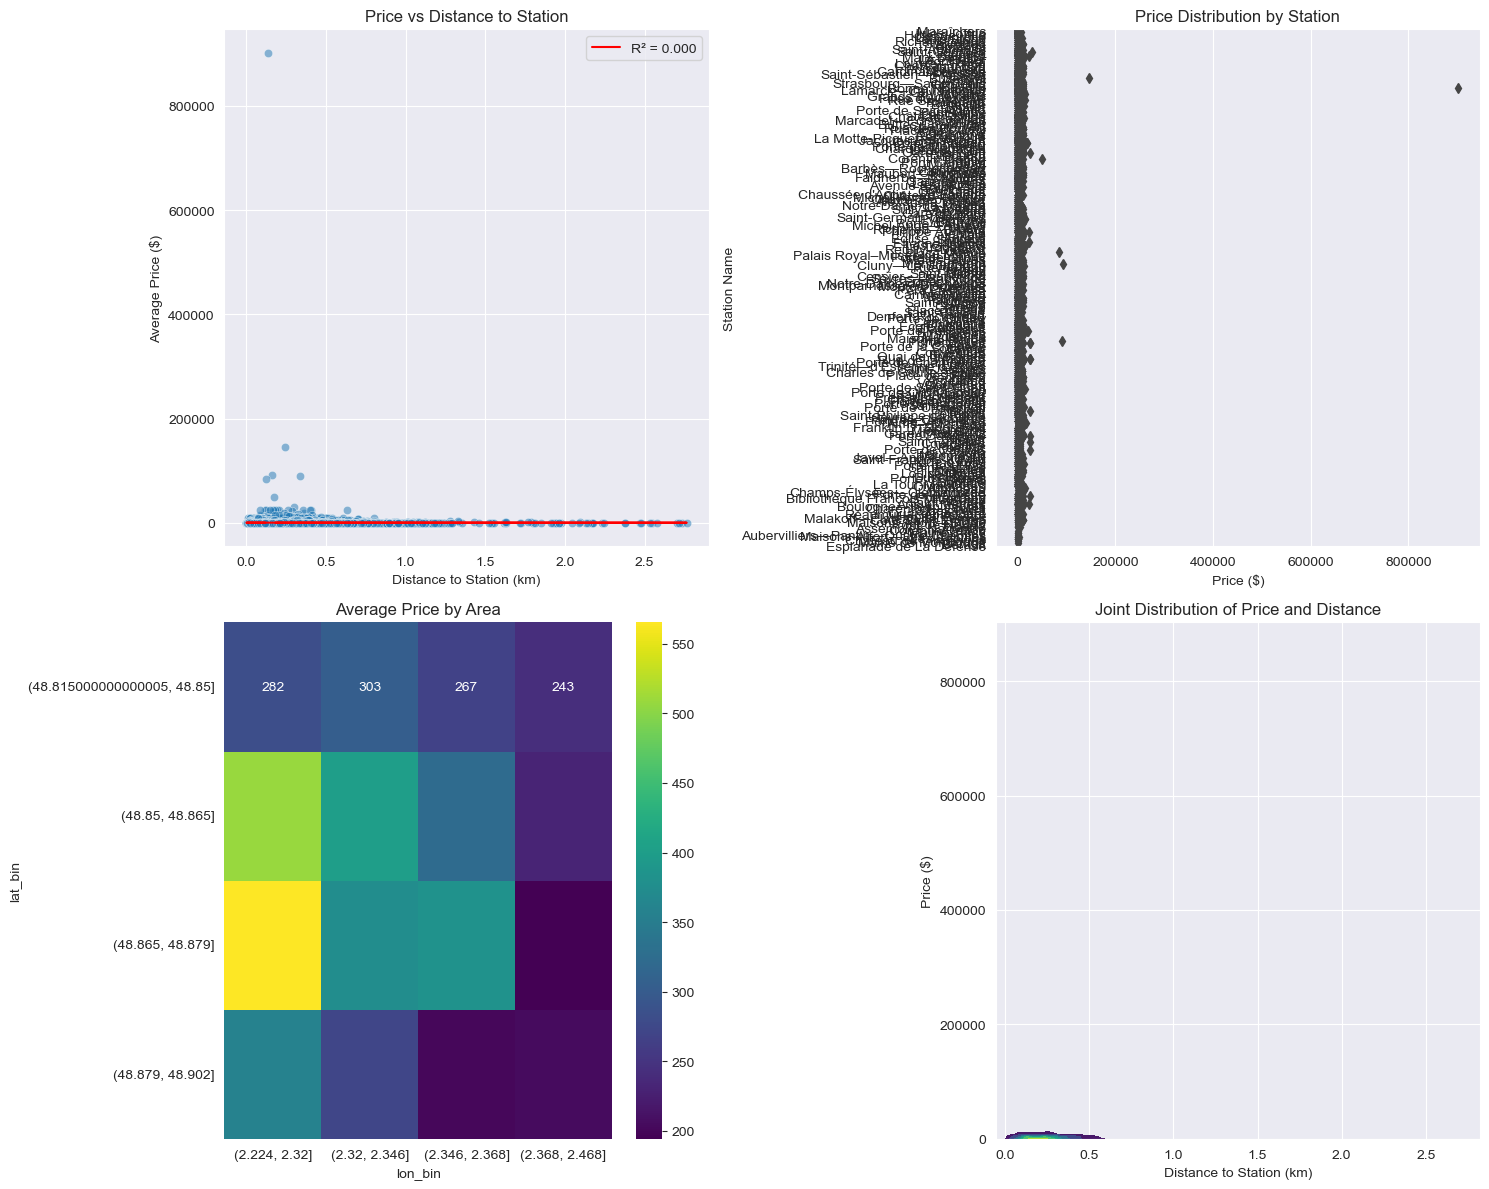


Correlation Analysis:
Correlation coefficient: -0.002
R-squared value: 0.000
P-value: 4.476e-01

Price Statistics by Distance Quartile:
                         mean  median          std  count
distance_quartile                                        
Q1 (Closest)       333.228989   150.0  5303.178167  29701
Q2                 300.506495   150.0   958.756788  29701
Q3                 303.686663   145.0  1123.330126  29701
Q4 (Farthest)      302.918080   140.0   901.586001  29701

Top 5 Most Expensive Areas by Average Price:
                              avg_price  num_listings  avg_distance
closest_station                                                    
Bonne Nouvelle                  1260.60           920          0.17
Champs-Élysées—Clemenceau       1009.33            36          0.33
Esplanade de La Défense          828.15             5          1.69
Cour Saint-Émilion               792.99            59          0.25
Boulogne—Pont de Saint-Cloud     780.00             2        

C:\Users\sjokk\AppData\Local\Temp\ipykernel_22004\787919914.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby('distance_quartile')['price'].agg(['mean', 'median', 'std', 'count']))


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Read the datasets
stations_df = pd.read_csv("paris_2024_data/airbnb_closest_stations.csv")
pricing_df = pd.read_csv("raw_data/merged/calendar_filtered_plus.csv")

# Clean and process the pricing data
pricing_df['price'] = pricing_df['price'].str.replace('$', '').str.replace(',', '').astype(float)
avg_prices = pricing_df.groupby('listing_id')['price'].mean().reset_index()

# Merge the datasets
merged_df = stations_df.merge(avg_prices, left_on='id', right_on='listing_id', how='inner')

# Calculate correlation coefficient
correlation = merged_df['distance_to_closest_station_km'].corr(merged_df['price'])
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['distance_to_closest_station_km'], merged_df['price'])

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot of price vs distance with regression line
sns.scatterplot(data=merged_df, x='distance_to_closest_station_km', y='price', alpha=0.5, ax=ax1)
ax1.plot(merged_df['distance_to_closest_station_km'], 
         intercept + slope * merged_df['distance_to_closest_station_km'], 
         color='red', label=f'R² = {r_value**2:.3f}')
ax1.set_title('Price vs Distance to Station')
ax1.set_xlabel('Distance to Station (km)')
ax1.set_ylabel('Average Price ($)')
ax1.legend()

# 2. Box plot of prices by station
station_price_data = merged_df.groupby('closest_station')['price'].agg(['mean', 'count']).reset_index()
station_price_data = station_price_data[station_price_data['count'] >= 5]  # Filter stations with at least 5 listings
sns.boxplot(data=merged_df[merged_df['closest_station'].isin(station_price_data['closest_station'])], 
            y='closest_station', x='price', ax=ax2)
ax2.set_title('Price Distribution by Station')
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Station Name')

# 3. Heatmap of average prices by area
merged_df['lat_bin'] = pd.qcut(merged_df['latitude'], 4)
merged_df['lon_bin'] = pd.qcut(merged_df['longitude'], 4)
avg_price_by_area = merged_df.groupby(['lat_bin', 'lon_bin'])['price'].mean().unstack()
sns.heatmap(avg_price_by_area, ax=ax3, cmap='viridis', annot=True, fmt='.0f')
ax3.set_title('Average Price by Area')

# 4. Joint distribution plot
sns.kdeplot(data=merged_df, x='distance_to_closest_station_km', y='price', 
            fill=True, cmap='viridis', ax=ax4)
ax4.set_title('Joint Distribution of Price and Distance')
ax4.set_xlabel('Distance to Station (km)')
ax4.set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCorrelation Analysis:")
print(f"Correlation coefficient: {correlation:.3f}")
print(f"R-squared value: {r_value**2:.3f}")
print(f"P-value: {p_value:.3e}")

print("\nPrice Statistics by Distance Quartile:")
merged_df['distance_quartile'] = pd.qcut(merged_df['distance_to_closest_station_km'], 4, labels=['Q1 (Closest)', 'Q2', 'Q3', 'Q4 (Farthest)'])
print(merged_df.groupby('distance_quartile')['price'].agg(['mean', 'median', 'std', 'count']))

print("\nTop 5 Most Expensive Areas by Average Price:")
area_prices = merged_df.groupby('closest_station').agg({
    'price': ['mean', 'count'],
    'distance_to_closest_station_km': 'mean'
}).round(2)
area_prices.columns = ['avg_price', 'num_listings', 'avg_distance']
print(area_prices.sort_values('avg_price', ascending=False).head())

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Read the datasets
stations_df = pd.read_csv("paris_2024_data/airbnb_closest_stations.csv")
pricing_df = pd.read_csv("raw_data/merged/calendar_filtered_plus.csv")

# Clean and process the pricing data
pricing_df['price'] = pricing_df['price'].str.replace('$', '').str.replace(',', '').astype(float)
avg_prices = pricing_df.groupby('listing_id')['price'].mean().reset_index()

# Print statistics before filtering
print("Before filtering:")
print(f"Total number of listings: {len(avg_prices)}")
print("\nPrice statistics before filtering:")
print(avg_prices['price'].describe())

# Filter out listings with average price above 100,000
avg_prices_filtered = avg_prices[avg_prices['price'] <= 5000]

# Print statistics after filtering
print("\nAfter filtering:")
print(f"Total number of listings: {len(avg_prices_filtered)}")
print(f"Number of listings removed: {len(avg_prices) - len(avg_prices_filtered)}")
print("\nPrice statistics after filtering:")
print(avg_prices_filtered['price'].describe())

# Merge the datasets with filtered prices
merged_df = stations_df.merge(avg_prices_filtered, left_on='id', right_on='listing_id', how='inner')

# Calculate correlation coefficient
correlation = merged_df['distance_to_closest_station_km'].corr(merged_df['price'])
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['distance_to_closest_station_km'], merged_df['price'])

# Create separate figures for each plot
def save_individual_plots(merged_df, distance_stats, price_dist):
    # Plot 1: Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_df, x='distance_to_closest_station_km', y='price', alpha=0.5)
    plt.plot(merged_df['distance_to_closest_station_km'], 
             intercept + slope * merged_df['distance_to_closest_station_km'], 
             color='red', label=f'R² = {r_value**2:.3f}')
    plt.title('Price vs Distance to Station (Filtered)')
    plt.xlabel('Distance to Station (km)')
    plt.ylabel('Average Price ($)')
    plt.legend()
    plt.savefig('visualizations/plot1_scatter.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Plot 2: Price by distance range
    plt.figure(figsize=(8, 6))
    distance_stats.plot(kind='bar', y='mean')
    plt.title('Average Price by Distance Range')
    plt.xlabel('Distance Range')
    plt.ylabel('Average Price ($)')
    for i, v in enumerate(distance_stats['mean']):
        plt.text(i, v, f'${v:,.0f}\nn={distance_stats["count"][i]}', ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.savefig('visualizations/plot2_distance_range.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Plot 3: Price distribution
    plt.figure(figsize=(8, 6))
    price_dist.plot(kind='bar')
    plt.title('Distribution of Listings by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Listings')
    for i, v in enumerate(price_dist):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.savefig('visualizations/plot3_price_dist.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Plot 4: Density plot
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=merged_df, x='distance_to_closest_station_km', y='price', 
                fill=True, cmap='viridis')
    plt.title('Density Plot: Price vs Distance')
    plt.xlabel('Distance to Station (km)')
    plt.ylabel('Price ($)')
    plt.savefig('visualizations/plot4_density.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Plot 5: Joint Distribution Plot
    joint_plot = sns.jointplot(
        data=merged_df,
        x='distance_to_closest_station_km',
        y='price',
        kind='kde',
        fill=True,
        cmap='viridis',
        height=8,
        ratio=8,
        marginal_kws=dict(fill=True)
    )

    # Customize the joint plot
    joint_plot.fig.suptitle('Joint Distribution of Price and Distance', y=1.02, fontsize=12)
    joint_plot.ax_joint.set_xlabel('Distance to Station (km)')
    joint_plot.ax_joint.set_ylabel('Price ($)')

    # Add correlation information
    joint_plot.ax_joint.text(
        0.05, 0.95, 
        f'Correlation: {correlation:.3f}', 
        transform=joint_plot.ax_joint.transAxes,
        bbox=dict(facecolor='white', alpha=0.8)
    )

    # Save the joint plot
    joint_plot.savefig('visualizations/plot5_joint_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()

# Calculate distance ranges and price distributions
merged_df['distance_range'] = pd.cut(merged_df['distance_to_closest_station_km'], 
                                   bins=5, 
                                   labels=['0-0.2km', '0.2-0.4km', '0.4-0.6km', '0.6-0.8km', '0.8-1.0km'])
distance_stats = merged_df.groupby('distance_range')['price'].agg(['mean', 'count']).round(2)

price_ranges = pd.cut(merged_df['price'], 
                     bins=[0, 100, 200, 300, 500, 1000, np.inf],
                     labels=['$0-100', '$100-200', '$200-300', '$300-500', '$500-1000', '$1000+'])
price_dist = merged_df.groupby(price_ranges)['id'].count()

# Call the function to save individual plots
save_individual_plots(merged_df, distance_stats, price_dist)

# Print enhanced statistical analysis
print("\nCorrelation Analysis (after filtering):")
print(f"Correlation coefficient: {correlation:.3f}")
print(f"R-squared value: {r_value**2:.3f}")
print(f"P-value: {p_value:.3e}")

print("\nAverage Price by Distance Range:")
print(distance_stats)

print("\nPrice Range Distribution:")
print(price_dist)

# Calculate and print additional insights
print("\nKey Insights:")
print(f"Most common price range: ${price_dist.idxmax()}")
print(f"Average price for listings within 0.2km of station: ${merged_df[merged_df['distance_to_closest_station_km'] <= 0.2]['price'].mean():.2f}")
print(f"Average price for listings over 0.8km from station: ${merged_df[merged_df['distance_to_closest_station_km'] > 0.8]['price'].mean():.2f}")

C:\Users\sjokk\AppData\Local\Temp\ipykernel_22004\356666216.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  pricing_df = pd.read_csv("raw_data/merged/calendar_filtered_plus.csv")


Before filtering:
Total number of listings: 118804

Price statistics before filtering:
count    118804.000000
mean        310.085057
std        2789.156461
min           0.000000
25%          92.018942
50%         147.000000
75%         257.254005
max      901684.000000
Name: price, dtype: float64

After filtering:
Total number of listings: 118355
Number of listings removed: 449

Price statistics after filtering:
count    118355.000000
mean        264.610002
std         429.522675
min           0.000000
25%          92.000000
50%         145.781250
75%         252.153472
max        5000.000000
Name: price, dtype: float64


C:\Users\sjokk\AppData\Local\Temp\ipykernel_22004\356666216.py:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_stats = merged_df.groupby('distance_range')['price'].agg(['mean', 'count']).round(2)
C:\Users\sjokk\AppData\Local\Temp\ipykernel_22004\356666216.py:126: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_dist = merged_df.groupby(price_ranges)['id'].count()
C:\Users\sjokk\AppData\Local\Temp\ipykernel_22004\356666216.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFram


Correlation Analysis (after filtering):
Correlation coefficient: 0.002
R-squared value: 0.000
P-value: 5.960e-01

Average Price by Distance Range:
                  mean   count
distance_range                
0-0.2km         264.34  115426
0.2-0.4km       275.93    2810
0.4-0.6km       265.42      84
0.6-0.8km       294.48      22
0.8-1.0km       168.76      13

Price Range Distribution:
price
$0-100       37605
$100-200     42092
$200-300     15263
$300-500     11587
$500-1000     8192
$1000+        3612
Name: id, dtype: int64

Key Insights:
Most common price range: $$100-200
Average price for listings within 0.2km of station: $264.08
Average price for listings over 0.8km from station: $211.25


<Figure size 800x600 with 0 Axes>